# Clasificación utilizando XGBoost (Core)

<strong>Objetivo:</strong> Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

<strong>Dataset:</strong> [Heart Disease UCI](https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci)

<strong>Descripción del Dataset:</strong> El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

## Instrucciones

### Parte 1: Carga y Exploración Inicial de Datos

#### 1. Carga del Dataset:

* Cargar el dataset desde Kaggle.

#### 2. Exploración Inicial:

* Revisar la estructura del dataset.
* Describir las variables y su distribución.
* Identificar y documentar valores faltantes y outliers.

### Parte 2: Análisis Exploratorio de Datos (EDA)

#### 1. Análisis Estadístico Descriptivo:

* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
* Analizar la distribución de las variables categóricas.

#### 2. Visualizaciones:

* Crear histogramas y gráficos de barras para entender la distribución de las variables.
* Crear un mapa de calor para visualizar las correlaciones entre las variables.
* Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

#### 3. Valores Faltantes y Outliers:

* Detectar y tratar valores faltantes.
* Identificar y manejar outliers.

### Parte 3: Preprocesamiento de Datos

#### 1. Transformación de Columnas:

* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

#### 2. División del Conjunto de Datos:

* Dividir el dataset en conjuntos de entrenamiento y prueba.

### Parte 4. Implementación de XGBoost

#### 1. Entrenamiento del Modelo:

* Entrenar un modelo de XGBoost con hiperparámetros básicos.
* Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

#### 2. Optimización de Hiperparámetros:

* Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.

#### 3. Evaluación del Modelo Optimizado:

* Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

# Resolución

## Parte 1: Carga y Exploración Inicial de Datos

### 1. Carga del Dataset:

In [31]:
import pandas as pd


camino_ds = "../data/HeartDiseaseTrain-Test.csv"
df = pd.read_csv(camino_ds, delimiter=",")

### 2. Exploración Inicial:

#### Revisar la estructura del dataset.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

#### Describir las variables y su distribución.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


#### Identificar y documentar valores faltantes y outliers.

In [34]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
age,0.0,0.000000,28.5,80.5
resting_blood_pressure,30.0,2.926829,90.0,170.0
cholestoral,16.0,1.560976,115.0,371.0
Max_heart_rate,4.0,0.390244,81.0,217.0
oldpeak,7.0,0.682927,-2.7,4.5
target,0.0,0.000000,-1.5,2.5


Podemos notar una tasa o nula de outliers en la mayoría de las columnas, con la excepción de resting_blood_pressure.

## Parte 2: Análisis Exploratorio de Datos (EDA)

#### Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).

In [35]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
age,1025.0,29.0,77.0,54.434146,9.072290,56.0,0.166665
resting_blood_pressure,1025.0,94.0,200.0,131.611707,17.516718,130.0,0.133094
cholestoral,1025.0,126.0,564.0,246.000000,51.592510,240.0,0.209726
Max_heart_rate,1025.0,71.0,202.0,149.114146,23.005724,152.0,0.154283
oldpeak,1025.0,0.0,6.2,1.071512,1.175053,0.8,1.096631
target,1025.0,0.0,1.0,0.513171,0.500070,1.0,0.974472


Notamos que el promedio es representativo para casi todas las columnas excepto oldpeak. La columna target es una columna booleana por lo que no influye el coeficiente de variación. Finalmente, los mínimos y máximos fueron corroborados con sus valores normales y están en rangos correctos. Por lo cual, no hay datos erróneos en las variables numéricas.

#### Analizar la distribución de las variables categóricas.

In [36]:
resumen_categorico = df.describe(include='object').T

resumen_categorico

,count,unique,top,freq
sex,1025,2,Male,713
chest_pain_type,1025,4,Typical angina,497
fasting_blood_sugar,1025,2,Lower than 120 mg/ml,872
rest_ecg,1025,3,ST-T wave abnormality,513
exercise_induced_angina,1025,2,No,680
slope,1025,3,Flat,482
vessels_colored_by_flourosopy,1025,5,Zero,578
thalassemia,1025,4,Fixed Defect,544


Procedemos a limpiar los datos para que queden con sus tipos correspondientes.

In [37]:
from utils.eda_utils import obtener_columnas_categoricas_df, limpiar_cadena

columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

Columnas booleanas.

In [38]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["No", "Yes"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
    ["n", "y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "No","no", "N", "n"]:
        return False

    if x in [1, 1.0, "true", "yes", "Yes", "si", "Y", "y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'sex': ['male' 'female']
Valores de columna 'fasting_blood_sugar': ['lower than 120 mg/ml' 'greater than 120 mg/ml']
Valores de columna 'exercise_induced_angina': ['no' 'yes']
La columna 'exercise_induced_angina' es booleana. Será convertida.
Valores de columna 'target': [0 1]
La columna 'target' es booleana. Será convertida.
Columnas convertidas a booleanas: ['exercise_induced_angina', 'target']


Columnas categóricas.

In [39]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()


for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'sex': ['male', 'female']
Valores únicos para columna 'chest_pain_type': ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
Valores únicos para columna 'fasting_blood_sugar': ['lower than 120 mg/ml', 'greater than 120 mg/ml']
Valores únicos para columna 'rest_ecg': ['st-t wave abnormality', 'normal', 'left ventricular hypertrophy']
Valores únicos para columna 'slope': ['downsloping', 'upsloping', 'flat']
Valores únicos para columna 'vessels_colored_by_flourosopy': ['two', 'zero', 'one', 'three', 'four']
Valores únicos para columna 'thalassemia': ['reversable defect', 'fixed defect', 'normal', 'no']


Detectamos varias variables ordinales. Esto se debe tener en cuenta para la codificación.

In [40]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'sex': 2
Valores únicos columna 'sex': ['male', 'female']
Se procede a convertir la columna 'sex' a categórica
Cant. únicos para columna 'chest_pain_type': 4
Valores únicos columna 'chest_pain_type': ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
Se procede a convertir la columna 'chest_pain_type' a categórica
Cant. únicos para columna 'fasting_blood_sugar': 2
Valores únicos columna 'fasting_blood_sugar': ['lower than 120 mg/ml', 'greater than 120 mg/ml']
Se procede a convertir la columna 'fasting_blood_sugar' a categórica
Cant. únicos para columna 'rest_ecg': 3
Valores únicos columna 'rest_ecg': ['st-t wave abnormality', 'normal', 'left ventricular hypertrophy']
Se procede a convertir la columna 'rest_ecg' a categórica
Cant. únicos para columna 'slope': 3
Valores únicos columna 'slope': ['downsloping', 'upsloping', 'flat']
Se procede a convertir la columna 'slope' a categórica
Cant. únicos para columna 'vessels_colored_by_flourosopy

In [41]:
for columna in obtener_columnas_categoricas_df(df):
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'sex': ['male', 'female']
Valores únicos para columna 'chest_pain_type': ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
Valores únicos para columna 'fasting_blood_sugar': ['lower than 120 mg/ml', 'greater than 120 mg/ml']
Valores únicos para columna 'rest_ecg': ['st-t wave abnormality', 'normal', 'left ventricular hypertrophy']
Valores únicos para columna 'slope': ['downsloping', 'upsloping', 'flat']
Valores únicos para columna 'vessels_colored_by_flourosopy': ['two', 'zero', 'one', 'three', 'four']
Valores únicos para columna 'thalassemia': ['reversable defect', 'fixed defect', 'normal', 'no']


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1025 non-null   int64   
 1   sex                            1025 non-null   category
 2   chest_pain_type                1025 non-null   category
 3   resting_blood_pressure         1025 non-null   int64   
 4   cholestoral                    1025 non-null   int64   
 5   fasting_blood_sugar            1025 non-null   category
 6   rest_ecg                       1025 non-null   category
 7   Max_heart_rate                 1025 non-null   int64   
 8   exercise_induced_angina        1025 non-null   bool    
 9   oldpeak                        1025 non-null   float64 
 10  slope                          1025 non-null   category
 11  vessels_colored_by_flourosopy  1025 non-null   category
 12  thalassemia                    102

Todas las columnas fueron convertidas a su tipo correspondiente.

### 2. Visualizaciones:

#### Crear histogramas y gráficos de barras para entender la distribución de las variables.

##### Histogramas

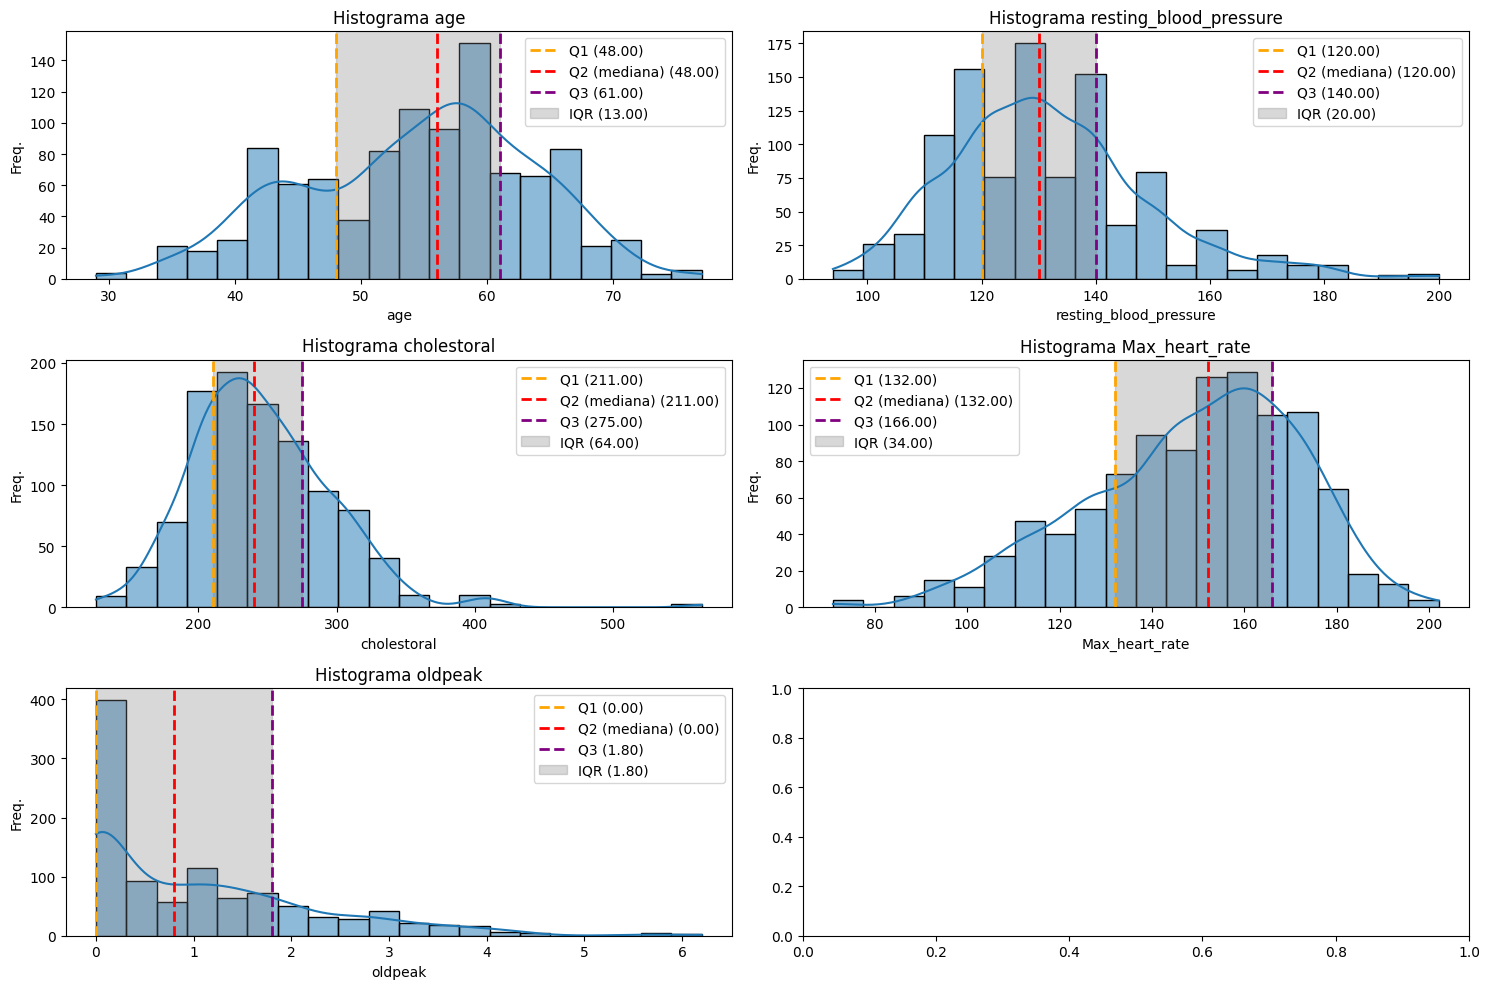

In [43]:
from utils.eda_utils import graficar_histogramas, obtener_columnas_numericas_df


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=2, bins=20, kde=True, figsize=(15, 10))

Podemos notar que la mayoría de las columnas con excepción de oldpeak tienen una distribución relativamente normal.

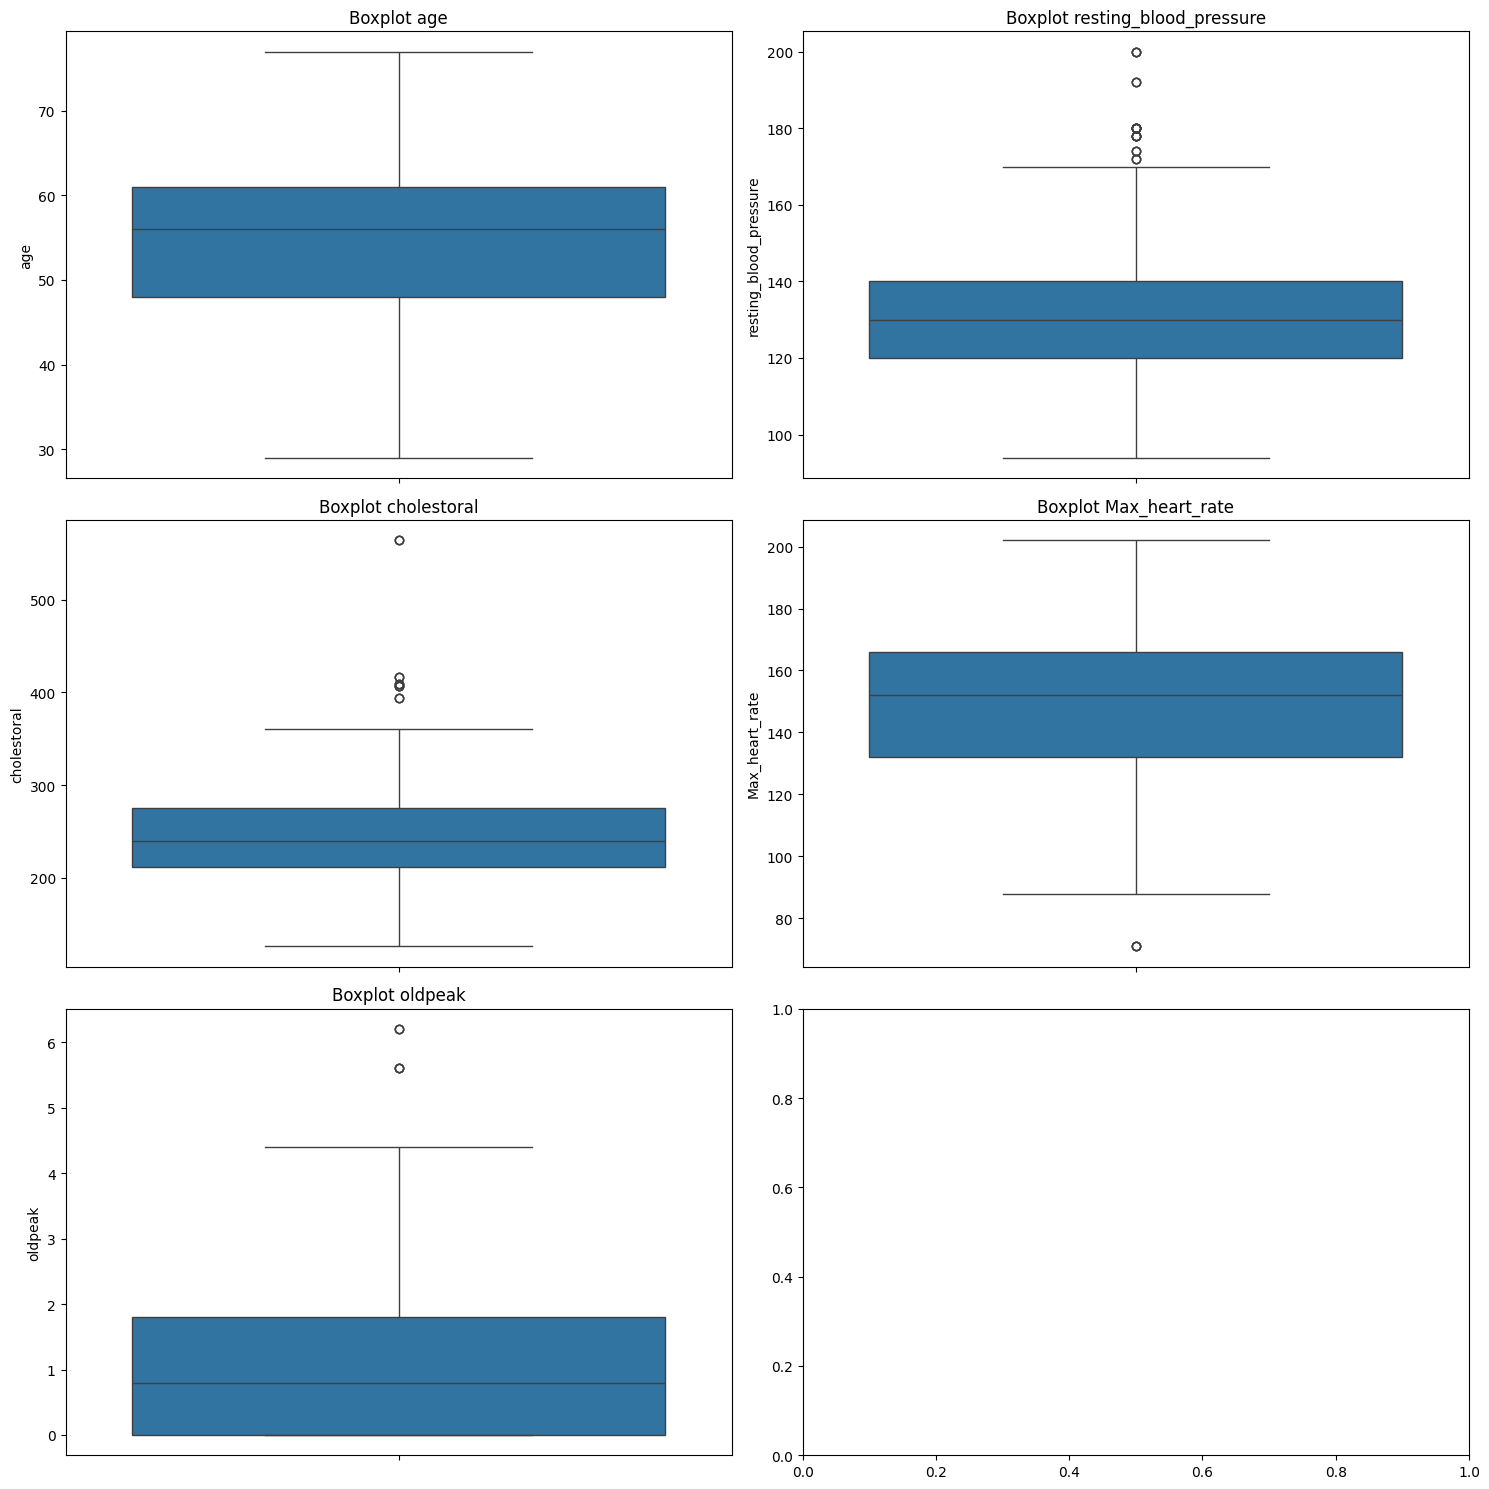

In [44]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=2, figsize=(15, 15))

Podemos detectar outliers en los gráficos. Se debe tener en cuenta al elegir la estrategia de escalamiento.

##### Gráficos de barras en columnas categóricas.

/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/3_boosting/3_clasificacion_xgboost/notebooks/utils/eda_utils.py:286: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/3_boosting/3_clasificacion_xgboost/notebooks/utils/eda_utils.py:286: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/3_boosting/3_clasificacion_xgboost/notebooks/util

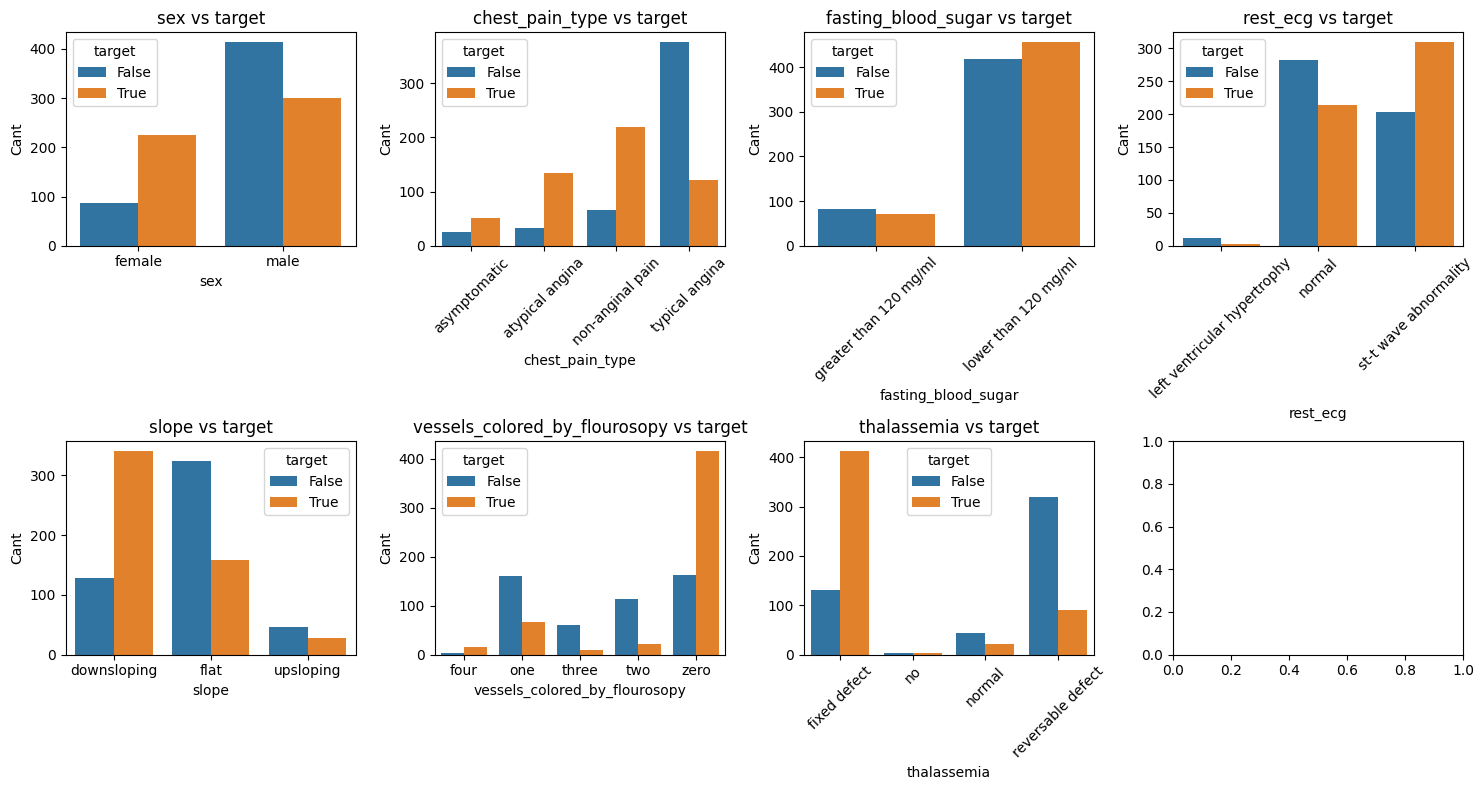

In [45]:
from utils.eda_utils import graficar_barras_conteo_contra_columna

columnas_categoricas = obtener_columnas_categoricas_df(df)

rotations = {
    "chest_pain_type": 45,
    "fasting_blood_sugar": 45,
    "rest_ecg": 45,
    "thalassemia": 45,
}

graficar_barras_conteo_contra_columna(df, columnas_categoricas, "target", nro_columnas=4, rotations=rotations, figsize=(15, 8))

De estos gráficos podemos notar, que las columnas categóricas influyen en si la persona tiene diabetes o no, ya que la proporción de true y false aparentemente es diferente dependiendo de la clase.

#### Crear un mapa de calor para visualizar las correlaciones entre las variables.

                             age  resting_blood_pressure  cholestoral  \
age                     1.000000                0.271121     0.219823   
resting_blood_pressure  0.271121                1.000000     0.127977   
cholestoral             0.219823                0.127977     1.000000   
Max_heart_rate         -0.390227               -0.039264    -0.021772   
oldpeak                 0.208137                0.187434     0.064880   

                        Max_heart_rate   oldpeak  
age                          -0.390227  0.208137  
resting_blood_pressure       -0.039264  0.187434  
cholestoral                  -0.021772  0.064880  
Max_heart_rate                1.000000 -0.349796  
oldpeak                      -0.349796  1.000000  


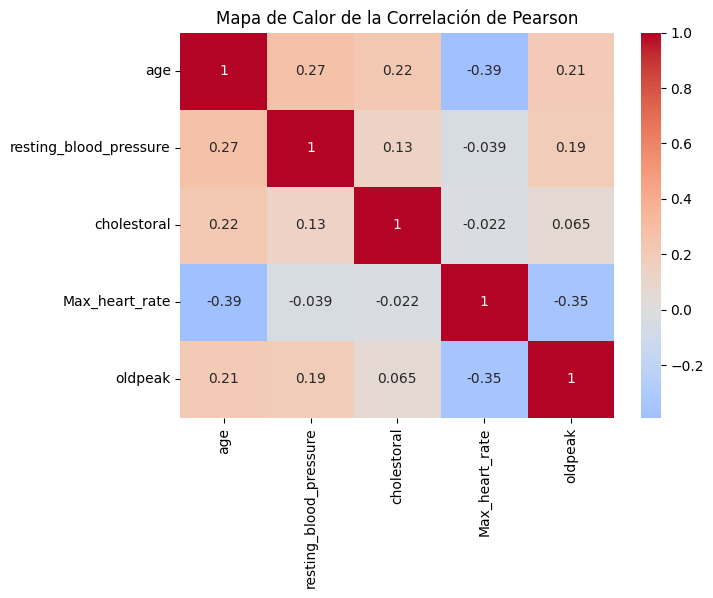

In [46]:
from utils.eda_utils import graficar_mapa_correlacion


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_mapa_correlacion(df, columnas_numericas, figsize=(7, 5))

Se pueden encontrar siertas variables con correlaciones, como por ejemplo Max_heart_rate vs age, y Max_heart_rate vs oldpreak. No obstante, al ser la variable target booleana, debemos también graficar un mapa de correlación para determinar si las columnas numéricas están correlacionadas con target.

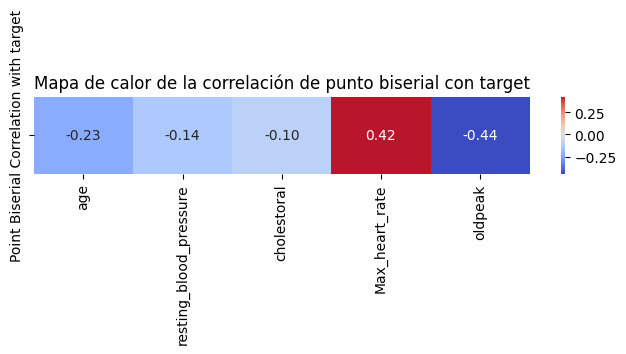

In [47]:
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = obtener_columnas_numericas_df(df)
# Calcular la correlación de punto biserial entre Churn y las variables numéricas
churn_corr = {col: pointbiserialr(df['target'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
churn_corr_df = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Point Biserial Correlation with target'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(churn_corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con target')
plt.show()

Podemos notar varias correlaciones que serán útiles al momento de entrenar el modelo.

#### Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

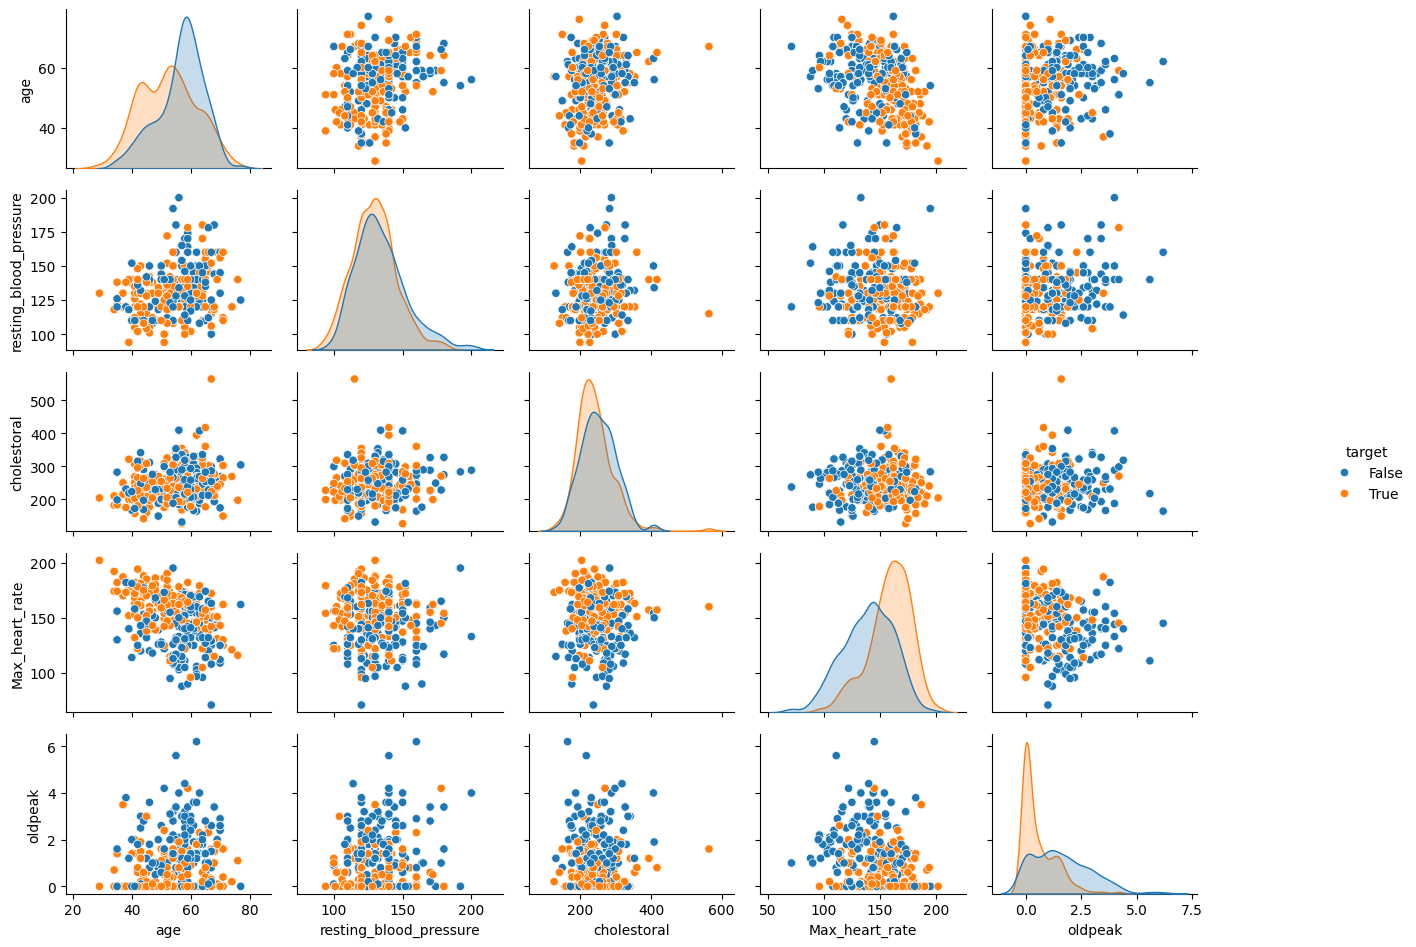

In [48]:
import matplotlib.pyplot as plt

palette = sns.color_palette("Spectral")
g = sns.pairplot(df[[*columnas_numericas] + ["target"]], hue='target', height=1.2, diag_kind = 'kde')
g.figure.set_size_inches(15, 10)
plt.show()

De los gráficos de dispersión, no se pueden visualizar correlaciones muy fuertes, y existe mucha dispersión en la mayoría de las columnas.

### 3. Valores Faltantes y Outliers:

#### Detectar y tratar valores faltantes.

In [49]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


estadisticas_datos_nulos = obtener_estadisticas_datos_nulos(df)
estadisticas_datos_nulos[estadisticas_datos_nulos["Na en q"] > 0]

,datos sin NAs en q,Na en q,Na en %


No existen datos nulos en este dataset, por lo que no será necesario tratarlos.

#### Identificar y manejar outliers.

In [50]:
obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
age,0.0,0.000000,28.5,80.5
resting_blood_pressure,30.0,2.926829,90.0,170.0
cholestoral,16.0,1.560976,115.0,371.0
Max_heart_rate,4.0,0.390244,81.0,217.0
oldpeak,7.0,0.682927,-2.7,4.5


Tal como se vió previamente, existen muchos outliers en las columnas. Por este motivo, la mejor estrategia para manejarlos es usando el modelo de escalamiento RobustScaler. Se implementará en el pipeline del modelo más adelante.

## Parte 3: Preprocesamiento de Datos

### 1. Transformación de Columnas:

#### Codificar variables categóricas utilizando One-Hot Encoding.

#### Escalar características numéricas utilizando StandardScaler.

Ambos pasos se realizarán en un mismo código.

In [51]:
df.columns.tolist()

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_pressure',
 'cholestoral',
 'fasting_blood_sugar',
 'rest_ecg',
 'Max_heart_rate',
 'exercise_induced_angina',
 'oldpeak',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia',
 'target']

In [52]:
columnas_prediccion = [
    'age',
    'sex',
    'chest_pain_type',
    'resting_blood_pressure',
    'cholestoral',
    'fasting_blood_sugar',
    'rest_ecg',
    'Max_heart_rate',
    'exercise_induced_angina',
    'oldpeak',
    'slope',
    'vessels_colored_by_flourosopy',
    'thalassemia',
    # 'target',
]

campo_salida = "target"

X = df[[*columnas_prediccion]]
y = df[campo_salida]

Verificamos las columnas ordinales.

In [53]:
columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    valores_unicos = df[columna].unique().tolist()
    print(f"Valores únicos para columna '{columna}': {valores_unicos}")

Valores únicos para columna 'sex': ['male', 'female']
Valores únicos para columna 'chest_pain_type': ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
Valores únicos para columna 'fasting_blood_sugar': ['lower than 120 mg/ml', 'greater than 120 mg/ml']
Valores únicos para columna 'rest_ecg': ['st-t wave abnormality', 'normal', 'left ventricular hypertrophy']
Valores únicos para columna 'slope': ['downsloping', 'upsloping', 'flat']
Valores únicos para columna 'vessels_colored_by_flourosopy': ['two', 'zero', 'one', 'three', 'four']
Valores únicos para columna 'thalassemia': ['reversable defect', 'fixed defect', 'normal', 'no']


In [54]:
columnas_ordinales = [
    "vessels_colored_by_flourosopy",
]

In [55]:
mapeo_columnas_ordinales = [
    {
        "col": "vessels_colored_by_flourosopy",
        "mapping": [
            "zero",
            "one",
            "two",
            "three",
            "four",
        ]
    },
]

Como el dataset posee muchos outliers, lo mejor sería usar RobustScaler, pero se opta por StandardScaler porque es lo que pide el ejercicio.

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


categories_ordinal_encoder = []
columnas_ordinal_encoder = []

# Preparamos los parámetros para el Ordinal Encoder.
for mapeo_columna in mapeo_columnas_ordinales:
    nombre_columna = mapeo_columna["col"]

    if nombre_columna in columnas_prediccion:
        mapeo_columnas = mapeo_columna["mapping"]

        categories_ordinal_encoder.append(mapeo_columnas)
        columnas_ordinal_encoder.append(nombre_columna)

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas_a_convertir_onehot = []

# Sacamos solamente las columnas que se requiera convertir a one hot,
# excluyendo las columnas ordinales.
for columna in columnas_categoricas:
    if columna not in columnas_ordinal_encoder and columna in columnas_prediccion:
        columnas_categoricas_a_convertir_onehot.append(columna)

columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas_a_escalar = []

# Obtenemos las columnas que requieren escalamiento.
for columna in columnas_numericas:
    if columna in columnas_prediccion:
        columnas_numericas_a_escalar.append(columna)

preprocessor = ColumnTransformer(
    transformers=[
        (
            "scaler",
            StandardScaler(),
            columnas_numericas_a_escalar,
        ),
        (
            "ordinal",
            OrdinalEncoder(categories=categories_ordinal_encoder),
            columnas_ordinal_encoder,
        ),
        (
            "onehot",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

Verificamos que las columnas hayan sido transformadas correctamente

In [57]:
X_transf = preprocessor.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   scaler__age                                         1025 non-null   float64
 1   scaler__resting_blood_pressure                      1025 non-null   float64
 2   scaler__cholestoral                                 1025 non-null   float64
 3   scaler__Max_heart_rate                              1025 non-null   float64
 4   scaler__oldpeak                                     1025 non-null   float64
 5   ordinal__vessels_colored_by_flourosopy              1025 non-null   float64
 6   onehot__sex_female                                  1025 non-null   float64
 7   onehot__sex_male                                    1025 non-null   float64
 8   onehot__chest_pain_type_asymptomatic                1025 non-null   float64
 9

In [58]:
obtener_estadisticas_datos_nulos(df_transf)

,datos sin NAs en q,Na en q,Na en %
scaler__age,1025,0,0.0
onehot__fasting_blood_sugar_lower than 120 mg/ml,1025,0,0.0
onehot__thalassemia_reversable defect,1025,0,0.0
onehot__thalassemia_normal,1025,0,0.0
onehot__thalassemia_no,1025,0,0.0
onehot__thalassemia_fixed defect,1025,0,0.0
onehot__slope_upsloping,1025,0,0.0
onehot__slope_flat,1025,0,0.0
onehot__slope_downsloping,1025,0,0.0
onehot__rest_ecg_st-t wave abnormality,1025,0,0.0


Al parecer, las transformaciones se realizan correctamente.

In [59]:
del X_transf
del df_transf

### 2. División del Conjunto de Datos:

#### Dividir el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

## Parte 4: Implementación de XGBoost

### 1. Entrenamiento del Modelo:

#### Entrenar un modelo de XGBoost con hiperparámetros básicos.

In [86]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

xb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

xb.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'cholestoral',
                                                   'Max_heart_rate',
                                                   'oldpeak']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two',
                                                                              'three',
                                                                              'four']]),
                                                  ['vessels_colored_by_flourosopy']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

#### Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

In [64]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

from utils.classification_utils import graficar_matrices_confusion, graficar_matriz_confusion

In [87]:
y_pred_xb = xb.predict(X_test)

classification_report_xb = classification_report(y_test, y_pred_xb)
conf_matrix_xb = confusion_matrix(y_test, y_pred_xb)


In [88]:
print("Repote Clasificación Xboost")
print(classification_report_xb)
print("\n")

Repote Clasificación Xboost
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       159
        True       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308





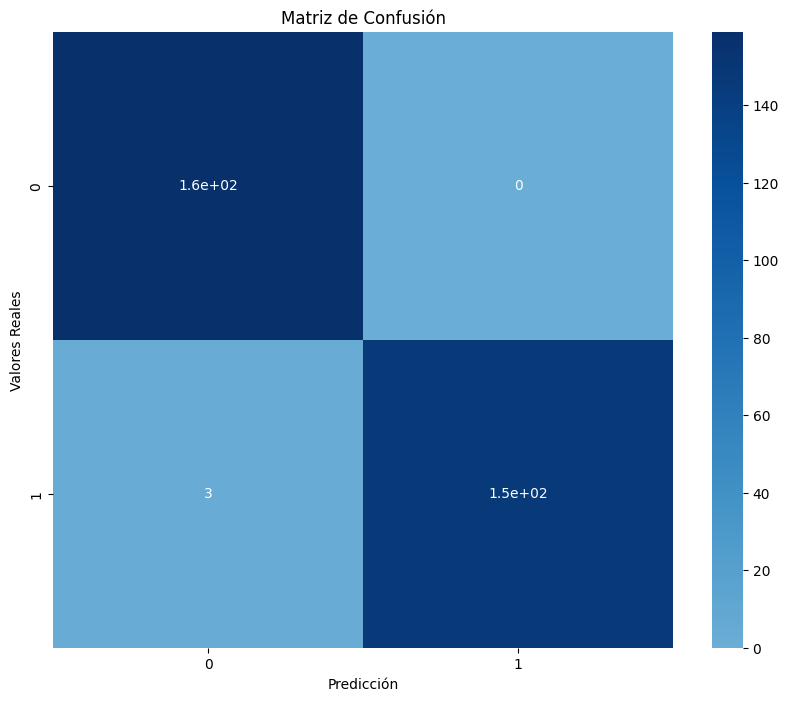

In [69]:
graficar_matriz_confusion(conf_matrix_xb)

Se puede notar lo siguiente:

* El modelo tiene una exactitud casi perfecta
* Solamente se encuentran 3 fallos en la matriz de confusión en la clase True

### 2. Optimización de Hiperparámetros:

#### Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.

In [101]:
from sklearn.model_selection import GridSearchCV


xb_gscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GridSearchCV(
        xgb.XGBClassifier(eval_metric='logloss', random_state=42),
        param_grid={
            "n_estimators": list(range(0, 501)),
        },
        scoring = 'roc_auc',
        cv=5,
        verbose=2,
        refit=True,
    )),
])

xb_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 501 candidates, totalling 2505 fits
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END .....................................n_estimators=0; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END ....................................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'cholestoral',
                                                   'Max_heart_rate',
                                                   'oldpeak']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two',
                                                                              'three',
                                                                              'four']]),
                                                  ['vessels_colored_by_flourosopy']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                s...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                              param_grid={'n_estimators': [0, 1, 2, 3, 4, 5, 6,
                                                           7, 8, 9, 10, 11, 12,
                                                           13, 14, 15, 16, 17,
                                                           18, 19, 20, 21, 22,
                                                           23, 24, 25, 26, 27,
                                                           28, 29, ...]},
                              scoring='roc_auc', verbose=2))])

Parámetros encontrados:

In [102]:
params = xb_gscv.steps[-1][1].best_params_

params

{'n_estimators': 49}

### 3. Evaluación del Modelo Optimizado:

#### Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

In [103]:
y_pred_xb_gscv = xb_gscv.predict(X_test)

classification_report_xb_gscv = classification_report(y_test, y_pred_xb_gscv)

conf_matrix_xb_gscv = confusion_matrix(y_test, y_pred_xb_gscv)

In [104]:
print("Reporte sin Optimizar")
print(classification_report_xb)
print("\n")
print("Reporte GridSearchCV")
print(classification_report_xb_gscv)
print("\n")

Reporte sin Optimizar
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       159
        True       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Reporte GridSearchCV
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       159
        True       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308





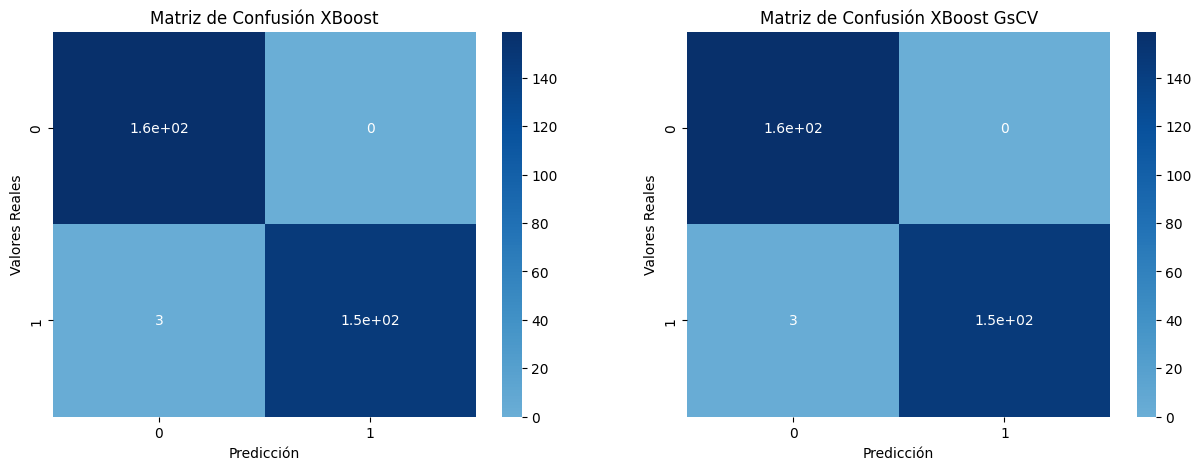

In [105]:
graficar_matrices_confusion(
    [conf_matrix_xb, conf_matrix_xb_gscv],
    ["XBoost", "XBoost GsCV"],
    nro_columnas=2,
    figsize=(15, 5),
)

De los resultados del reporte de clasificación y las matrices de confusión, podemos determinar que el optimizador GridSearchCV encontro un n_estimators menor (49) que provee el mismo rendimiento que el valor por defecto (100). Al proveer una mejor performance con un menor número de estimadores, se obtiene ahorro tanto en capacidad de procesamiento como en uso de memoria. Por este motivo, el modelo seleccionado para este problema es el XGBoost con un n_estimators=49.